<center>
<h1> PROYECTO PLANO INCLINADO </h1>
</center>
<h3> Para un plano inclinado sin fricción, tenemos... </h3>

<center>
<img src="plano.jpg"
    width="400"
    height="300">
</center>



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp
import math 

<h3>
 Definimos variables... 
</h3>

In [10]:

m = 3.0  # (kg)
g = 9.8  # (m/s^2)
theta = np.radians(math.pi / 4)  # (radianes)
L = 1.0  # (m)

<h3>
 Definimos el sistema de ecuaciones diferenciales... 
</h3>

In [11]:
def sistema(y, t):
    x, v = y
    dxdt = v
    dvdt = g * np.sin(theta)
    return [dxdt, dvdt]

<h4>
Tambien las condiciones iniciales 
</h4>

In [12]:
x0 = 0.0  # (m)
v0 = 0.0  # (m/s)
y0 = [x0, v0]

<h4>
Definimos puntos cada ciertos intervalos de tiempo
</h4>

In [13]:
t = np.linspace(0, 10, 100)

<h4>
Solucionamos el sistema y extraemos los datos de la posición y velocidad
</h4>

In [14]:
sol = odeint(sistema, y0, t)
x = sol[:, 0]
v = sol[:, 1]


<h4>
Creamos una tabla de datos con los resultados
</h4>

In [15]:
df = pd.DataFrame({"Tiempo (s)": t, "Posición (m)": x, "Velocidad (m/s)": v})


<h4>
AGREGAMOS UNA FUNCIÓN PARA VALIDAR LOS PARAMETROS Y GRAFICAMOS LAS SOLUCIONES EN TRES GRÁFICOS. X(t), V(t), a(t)
</h4>

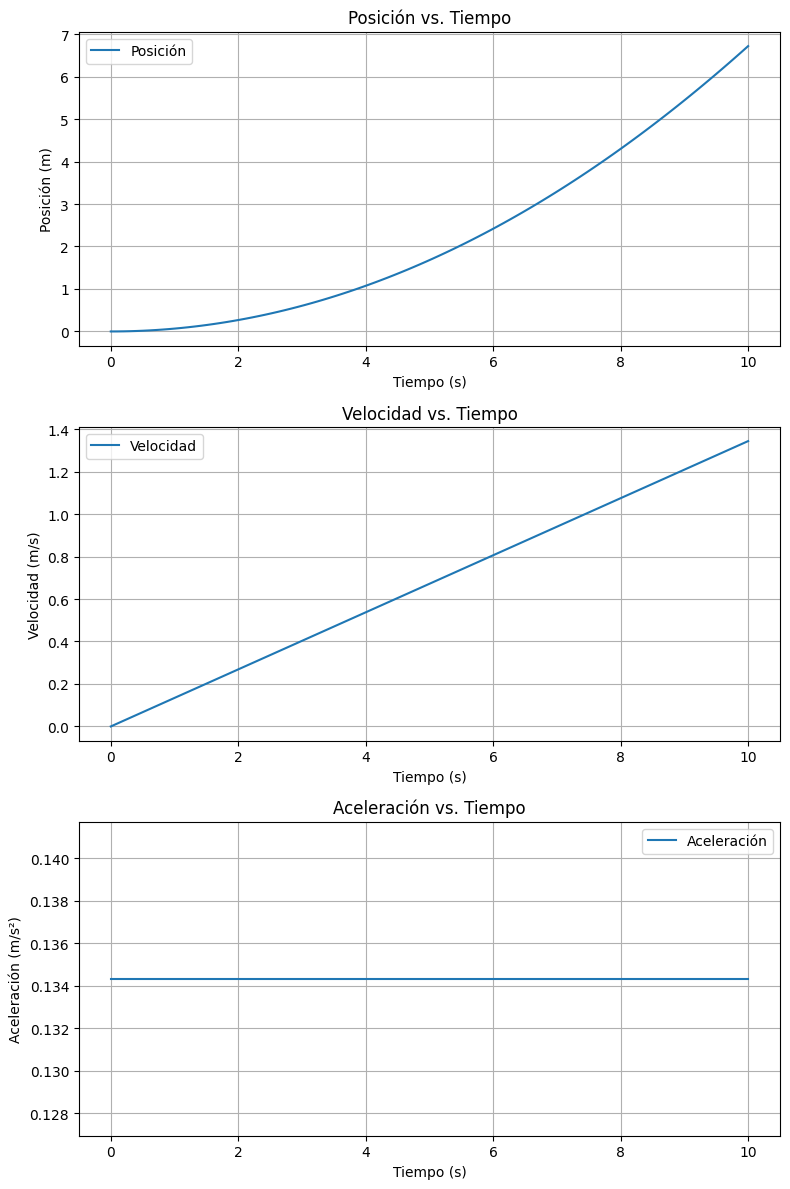

,Tiempo (s),Posición (m),Velocidad (m/s)
0,0.00000,0.000000,0.000000
1,0.10101,0.000685,0.013569
2,0.20202,0.002741,0.027138
3,0.30303,0.006168,0.040707
4,0.40404,0.010965,0.054276
...,...,...,...
95,9.59596,6.184813,1.289045
96,9.69697,6.315705,1.302614
97,9.79798,6.447967,1.316183
98,9.89899,6.581600,1.329752


In [18]:

# Validación de parámetros

if m <= 0 or theta < 0 or theta > np.pi / 2:
    print("Parámetros inválidos. Asegúrate de que la masa sea positiva y el ángulo esté en el rango [0, 90] grados.")
else:
    # Crear una figura y ejes para las gráficas
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))

    # Graficar posición vs. tiempo
    axs[0].plot(t, x, label="Posición")
    axs[0].set_xlabel("Tiempo (s)")
    axs[0].set_ylabel("Posición (m)")
    axs[0].set_title("Posición vs. Tiempo")
    axs[0].grid(True)
    axs[0].legend()

    # Graficar velocidad vs. tiempo
    axs[1].plot(t, v, label="Velocidad")
    axs[1].set_xlabel("Tiempo (s)")
    axs[1].set_ylabel("Velocidad (m/s)")
    axs[1].set_title("Velocidad vs. Tiempo")
    axs[1].grid(True)
    axs[1].legend()

    # Calcular la aceleración constante
    a = g * np.sin(theta)

    # Graficar aceleración constante vs. tiempo
    axs[2].plot(t, np.full_like(t, a), label="Aceleración")
    axs[2].set_xlabel("Tiempo (s)")
    axs[2].set_ylabel("Aceleración (m/s²)")
    axs[2].set_title("Aceleración vs. Tiempo")
    axs[2].grid(True)
    axs[2].legend()

    # Mostrar las gráficas
    plt.tight_layout()
    plt.show()

    # Imprimir el DataFrame
    display(df)